In [19]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [21]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [22]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

## Initialize Configs

In [23]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
EXPERIMENT_SESSION_UUID = '3976c1bf-99fa-49f4-97ec-44b13cb64ef4'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
SENSITIVE_ATTR_FOR_INTERVENTION = 'RAC1P'
# MODEL_NAMES = ['LogisticRegression']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [24]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [25]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [26]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [27]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(84, 33)

In [28]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall,Test_Set_Index
0,Accuracy,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-04 13:50:11.763,3976c1bf-99fa-49f4-97ec-44b13cb64ef4,Exp_iter_1,100,...,1.000000,0.000000,0.818384,1.000000,0.000000,0.778517,1.000000,0.000000,0.797600,0
19,F1,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-04 13:50:11.763,3976c1bf-99fa-49f4-97ec-44b13cb64ef4,Exp_iter_1,100,...,1.000000,0.000000,0.653928,1.000000,0.000000,0.709201,1.000000,0.000000,0.687783,0
38,FNR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-04 13:50:11.763,3976c1bf-99fa-49f4-97ec-44b13cb64ef4,Exp_iter_1,100,...,0.000000,1.000000,0.381526,0.000000,1.000000,0.342466,0.000000,1.000000,0.357417,0
57,FPR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-04 13:50:11.763,3976c1bf-99fa-49f4-97ec-44b13cb64ef4,Exp_iter_1,100,...,0.000000,1.000000,0.104857,0.000000,1.000000,0.137153,0.000000,1.000000,0.120049,0
76,Jitter,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-04 13:50:11.763,3976c1bf-99fa-49f4-97ec-44b13cb64ef4,Exp_iter_1,100,...,0.112819,0.216707,0.121828,0.098366,0.227552,0.143133,0.125409,0.205433,0.132935,0
95,Label_Stability,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-04 13:50:11.763,3976c1bf-99fa-49f4-97ec-44b13cb64ef4,Exp_iter_1,100,...,0.854949,0.698903,0.840735,0.877032,0.677178,0.813059,0.839921,0.718637,0.826307,0
114,PPV,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-04 13:50:11.763,3976c1bf-99fa-49f4-97ec-44b13cb64ef4,Exp_iter_1,100,...,1.000000,0.000000,0.693694,1.000000,0.000000,0.769679,1.000000,0.000000,0.739823,0
133,Positive-Rate,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-04 13:50:11.763,3976c1bf-99fa-49f4-97ec-44b13cb64ef4,Exp_iter_1,100,...,1.000000,0.623410,0.891566,1.000000,0.715789,0.854296,1.000000,0.574545,0.868563,0
152,Sample_Size,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-04 13:50:11.763,3976c1bf-99fa-49f4-97ec-44b13cb64ef4,Exp_iter_1,100,...,2457.000000,638.000000,1795.000000,1469.000000,326.000000,1955.000000,1522.000000,433.000000,3750.000000,0
171,Selection-Rate,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-04 13:50:11.763,3976c1bf-99fa-49f4-97ec-44b13cb64ef4,Exp_iter_1,100,...,0.306471,0.384013,0.247354,0.209666,0.417178,0.350895,0.346912,0.364896,0.301333,0


In [29]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [30]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [31]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [32]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

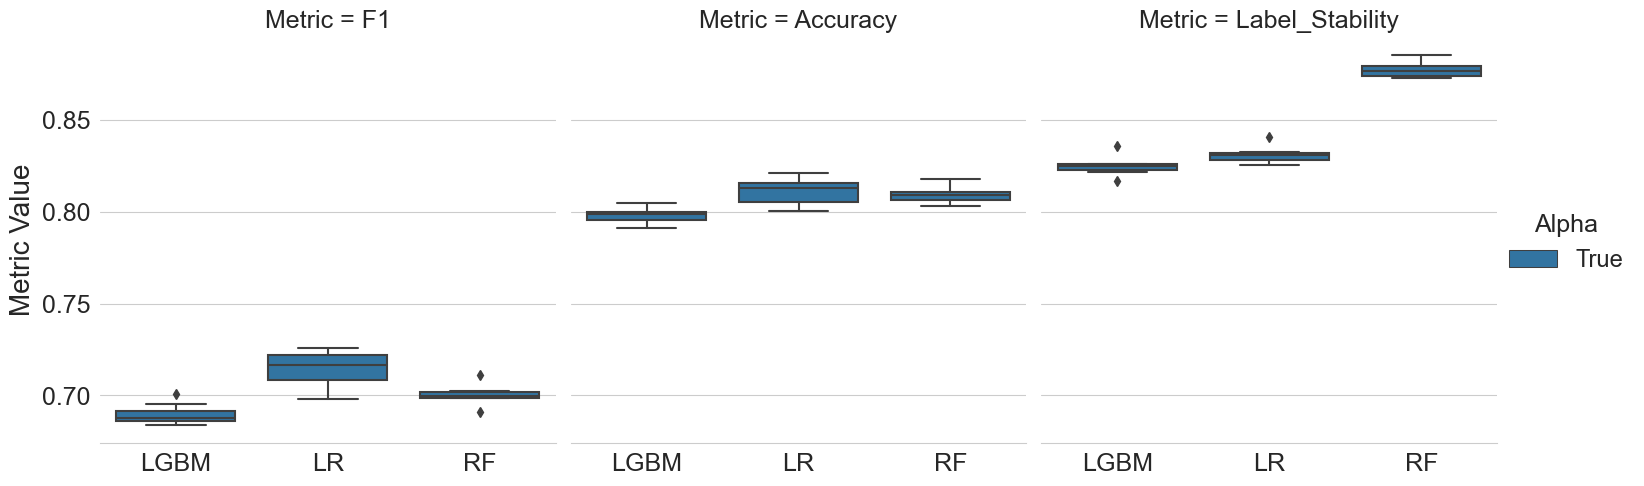

In [33]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

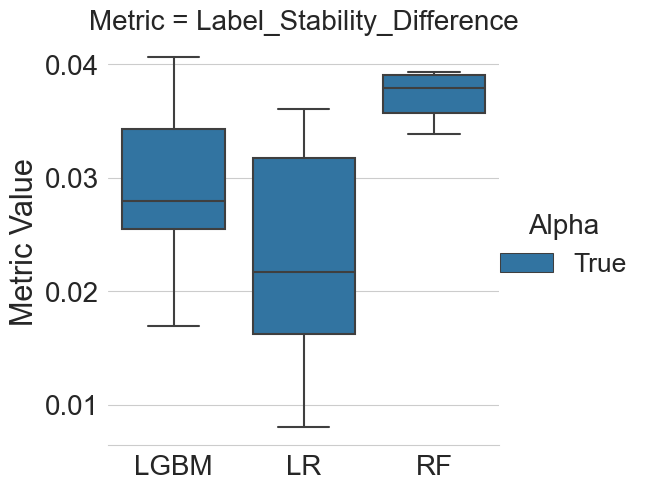

In [34]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

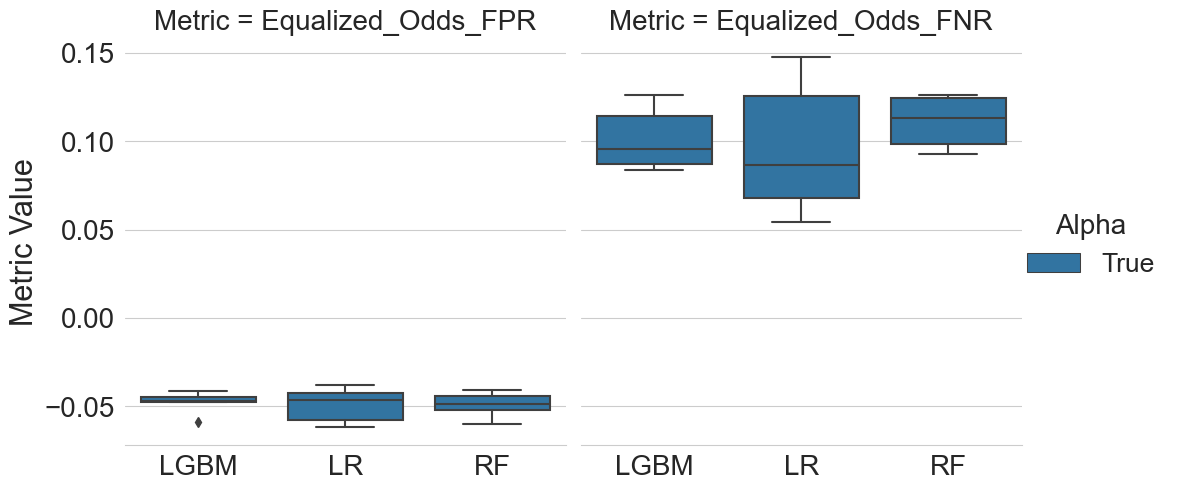

In [35]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

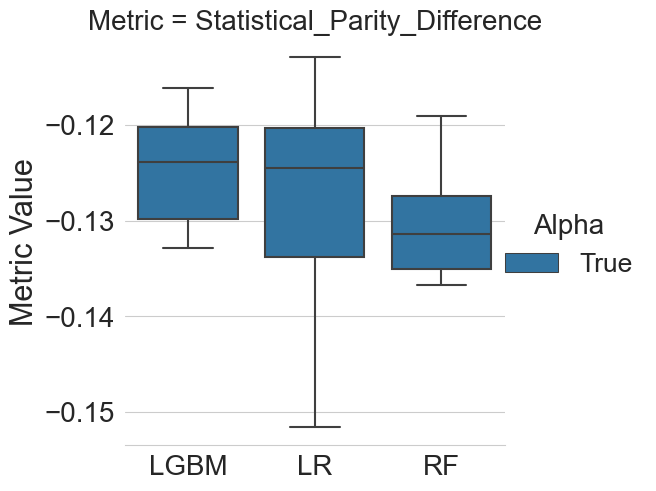

In [36]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)